In [1]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

# Leer el conjunto de datos de entrenamiento
train_data = pd.read_csv("/content/drive/MyDrive/SegundoParcial/pregunta1_ej191/train_dataset.csv", delimiter=",")

# Leer el conjunto de datos de prueba
test_data = pd.read_csv("/content/drive/MyDrive/SegundoParcial/pregunta1_ej191/test_dataset.csv", delimiter=",")

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [5]:

# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data.select_dtypes(include=[np.number]))
scaled_test_data = scaler.fit_transform(test_data.select_dtypes(include=[np.number]))

scaled_train_data
scaled_test_data


array([[-0.35669616,  0.59111183, -0.05481357, ..., -0.02597222,
        -0.15607634, -0.51681861],
       [ 0.05691196,  0.59111183,  0.73639599, ...,  0.04050711,
         1.89596878, -0.51681861],
       [-1.18391242,  1.67683673,  1.92321032, ...,  0.07374677,
        -0.19479417, -0.51681861],
       ...,
       [-0.35669616, -1.03747551, -1.2416279 , ..., -0.55780682,
        -0.50453683, -0.51681861],
       [-0.77030429,  0.04824939,  0.34079121, ...,  0.04050711,
        -0.19479417,  1.93491486],
       [-1.59752055,  1.67683673,  1.13200076, ...,  0.00726745,
        -0.33030658, -0.51681861]])

In [6]:
from sklearn.cluster import KMeans

# Definir el número de clusters deseado
num_clusters = 2  # Puedes ajustar este valor según tu conocimiento del problema o mediante técnicas como la "elbow method"

# Inicializar el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

# Aplicar K-Means a los datos de entrenamiento normalizados
kmeans.fit(scaled_train_data)

# Obtener las etiquetas de los clusters para los datos de entrenamiento
train_cluster_labels = kmeans.labels_

# También puedes predecir los clusters para los datos de prueba si es necesario
# test_cluster_labels = kmeans.predict(scaled_test_data)

# Verificar los resultados
print("Etiquetas de cluster para los datos de entrenamiento:")
print(train_cluster_labels)

# print("\nEtiquetas de cluster para los datos de prueba:")
# print(test_cluster_labels)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Verificar los centroides
print("\nCentroides de los clusters:")
print(centroids)


Etiquetas de cluster para los datos de entrenamiento:
[0 0 0 ... 0 1 1]

Centroides de los clusters:
[[-3.26627896e-01  6.26936039e-01  6.22159335e-01  4.94128690e-01
   1.42447442e-01  1.53102632e-01 -6.98954630e-02 -7.54267056e-02
   2.23302456e-01  2.52304073e-01  1.22513333e-01  5.43159017e-04
   3.33240603e-01 -3.42834263e-01  1.09383427e-02  5.92278500e-01
   3.02441541e-02  3.98959434e-01  1.23519514e-01  2.05995727e-01
   2.58450171e-01  1.01666399e-01  4.48502572e-01]
 [ 3.95498906e-01 -7.59128417e-01 -7.53344523e-01 -5.98318021e-01
  -1.72483147e-01 -1.85385034e-01  8.46332463e-02  9.13307770e-02
  -2.70386817e-01 -3.05503559e-01 -1.48345839e-01 -6.57686620e-04
  -4.03505932e-01  4.15122461e-01 -1.32447431e-02 -7.17163174e-01
  -3.66212745e-02 -4.83081885e-01 -1.49564177e-01 -2.49430883e-01
  -3.12945591e-01 -1.23103232e-01 -5.43071424e-01]]


In [7]:

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_train_data[np.random.choice(scaled_train_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("\nPredicciones de cluster para las nuevas muestras:")
print(y_pred)


Muestras seleccionadas:
[[-0.34215791  0.57802188  0.31491553  0.31499797 -0.02999845  0.38726171
  -0.16133735 -0.16399576  0.25832145  0.62178635  0.516301    0.33329711
  -0.83213945  1.55338769  0.02141905 -1.03686948 -0.21517609 -0.84322053
  -0.06248831 -0.35596775 -0.4408055  -0.52244324 -0.7618892 ]
 [ 1.31574823  0.57802188 -0.0727891  -0.24254243 -0.23059188 -0.42277239
  -0.16133735 -0.16399576 -0.40134076 -0.20649016  0.08030681 -0.62947183
  -0.73464943 -0.36210686 -0.18845621  0.11218344 -0.21517609 -0.38994967
  -0.37539004 -0.22821118 -0.32006464 -0.52244324  1.31252681]
 [-0.75663444  0.57802188  0.31491553 -0.54275649 -0.02999845 -0.01775534
  -0.16133735 -0.16399576 -0.32804496  0.31118266 -0.11346839 -0.62947183
  -0.76250372  0.86928249 -0.58488728  0.23985599 -0.21517609  0.51659204
  -0.16678889 -0.16433289  0.02203444 -0.52244324  1.31252681]
 [ 0.07231863 -0.51042661  0.70262017  0.85109451 -0.02999845  0.38726171
  -0.16133735 -0.16399576  0.62480045 -0.102955

<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

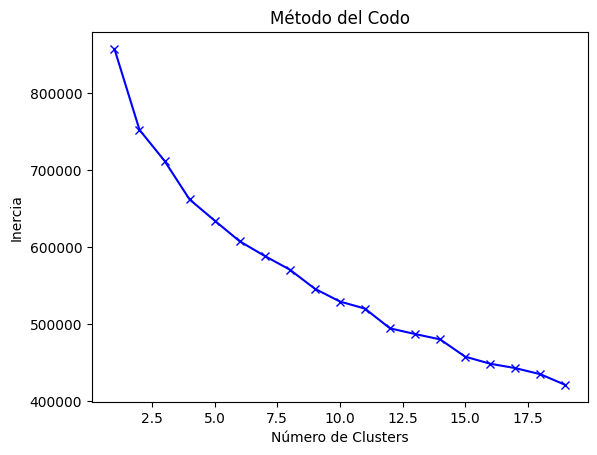

In [8]:
#METODO DEL CODO

# Tomar solo las características numéricas
none_y = scaled_train_data[:, :-1]

# Inicializar una lista para almacenar las inercias
inertias = []

# Rango de clusters a probar
k_range = range(1, 20)  # Prueba con un rango de 1 a 20 clusters

# Calcular la inercia para cada número de clusters en el rango especificado
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Encontrar el mejor número de clusters utilizando el método del codo
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster


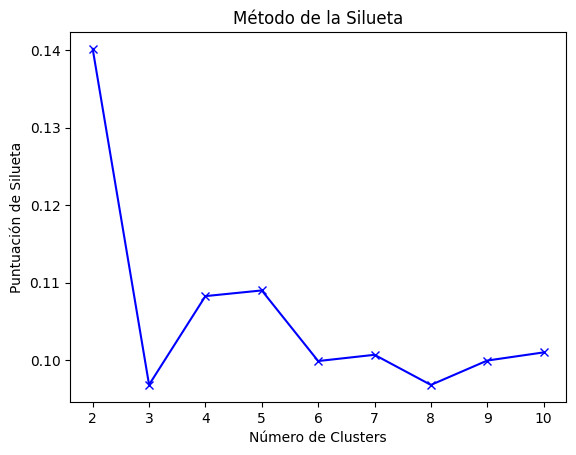

El número óptimo de clusters según la puntuación de silueta es: 2


In [9]:
#METODO DE LA SILUETA

# Inicializar una lista para almacenar las puntuaciones de silueta
silhouette_scores = []

# Rango de clusters a probar
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

# Calcular la puntuación de silueta para cada número de clusters en el rango especificado
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()

# Encontrar el mejor número de clusters utilizando la puntuación de silueta
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters

print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


In [10]:
# Imprimir la cantidad de ejemplos en cada conjunto
print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(scaled_train_data)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(scaled_test_data)}")


--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 38984
El 20% de ejemplos que serán para el prueba son: 16708


## **eliminamos la y**

In [11]:
none_y

array([[-0.75663444,  0.57802188,  1.47802943, ...,  2.80600746,
         1.71240639,  1.91408353],
       [-2.00006404,  1.12224612,  3.4165526 , ..., -0.06851546,
        -0.19932379,  1.91408353],
       [ 0.07231863, -1.05465085, -0.0727891 , ..., 43.84780685,
         4.7510512 , -0.52244324],
       ...,
       [-0.34215791,  0.57802188,  3.02884797, ..., -0.13239375,
        -0.09870641,  1.91408353],
       [-0.34215791, -0.51042661, -0.84819836, ..., -0.22821118,
        -0.46092897, -0.52244324],
       [ 0.90127169,  1.12224612, -0.46049373, ..., -0.48372433,
        -0.48105245, -0.52244324]])

In [12]:
scaled_train_data

array([[-0.75663444,  0.57802188,  1.47802943, ...,  1.71240639,
         1.91408353,  1.31252681],
       [-2.00006404,  1.12224612,  3.4165526 , ..., -0.19932379,
         1.91408353, -0.7618892 ],
       [ 0.07231863, -1.05465085, -0.0727891 , ...,  4.7510512 ,
        -0.52244324, -0.7618892 ],
       ...,
       [-0.34215791,  0.57802188,  3.02884797, ..., -0.09870641,
         1.91408353,  1.31252681],
       [-0.34215791, -0.51042661, -0.84819836, ..., -0.46092897,
        -0.52244324,  1.31252681],
       [ 0.90127169,  1.12224612, -0.46049373, ..., -0.48105245,
        -0.52244324,  1.31252681]])

In [13]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(scaled_train_data)
train_data['kmeans3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# Transformamos los datos de entrenamiento en distancias euclidianas a los centroides
X_digits_dist = kmeans.transform(scaled_train_data)


In [14]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(38984, 2)
[[ 5.39562347  7.61399235]
 [ 5.10836414  7.06070809]
 [70.87809148 71.35868216]
 ...
 [ 5.81821449  8.1220654 ]
 [ 5.24361588  3.66600649]
 [ 3.5518444   3.28472704]]


#Vemos la precision de los **clusters**

In [16]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=80, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(train_data)
silhouette_avg = silhouette_score(train_data, y_pred) # Calculamos el score de silueta del modelo
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.09669703492027268
